# Final Exam
# Machine Learning 2018-1
Keep saving your notebook to guarantee that you don't lose your work. Whenever the end of the exam is announced save the current version. 

---

In [1]:
import numpy as np
import pylab as pl

%matplotlib inline

## 1. (0.5)

Consider the following model inspired in a support vector machine. 

$$ f_w(x) = wx + w_0$$

where 

$$ w=\sum_{x_{i}\in X}\alpha_{i}\phi(x_{i}) $$

The loss function corresponds to the 'hinge' loss function that makes it equivalent to the traditional primal optimization formulation (without the margin or regularization term):

$$E(w, x, y) = \max(0, 1 - y f_w(x))$$

Implement this model modifying the following functions:

In [2]:
def predict_ksvm(alpha, X, kernel, x):
    result = 0
    # put your code here
    f = 0
    for i in range(len(X)):
        f += alpha[i] * kernel(X[i], x)
    result = f
    return result

def loss_ksvm(alpha, X, kernel, x, y):
    result = 0
    # put your code here
    e = max(0, 1 - y * predict_ksvm(alpha, X, kernel, x))
    result = e
    return result


Test your functions with the following code:

In [3]:
def k1(x, y):
    return np.dot(x, y)

def k2(x, y):
    return (np.dot(x, y) + 1) ** 2

def test_loss_ksvm():
    X = [[-2, -1],
         [-1, 3],
         [2.5, -1.5],
         [4, 2]]
    Y = [-1, 1, 1, -1]
    epsilon = 0.0001
    test1 = [0 , 0 , 6.3 , 3.3]
    test2 = [25.775 , 0 , 11.9 , 113.0]
    alpha = [0.1, 0.4, -0.5, 0.3]
    for i, x_i in enumerate(X):
        if abs(loss_ksvm(alpha, X, k1, x_i, Y[i]) - test1[i]) > epsilon:
            raise Exception("loss_ksvm test failed!")
    for i, x_i in enumerate(X):
        if abs(loss_ksvm(alpha, X, k2, x_i, Y[i]) - test2[i]) > epsilon:
            raise Exception("loss_ksvm test failed!")

test_loss_ksvm() 

## 2. (1.5)

Write a function that calculates the gradient of the loss with respect to the alpha parameter:

$$ \frac{\partial E}{\partial \alpha} $$

In [4]:
def de_dalpha(alpha, X, kernel, x, y):
    delta = np.zeros(len(alpha))
    # put your code here
    if loss_ksvm(alpha, X, kernel, x, y) > 0:
        for i in range(len(X)):
            delta[i] = -y * kernel(X[i], x)
    return delta


epsilon = 0.0001
X = [[-2, -1],
         [-1, 3],
         [2.5, -1.5],
         [4, 2]]
kernel = k1
alpha = np.random.randn(len(X))
x = np.random.randn(2)
y = np.random.randn(1)
print(de_dalpha(alpha, X, kernel, x, y))

[0. 0. 0. 0.]


Use the following functions to test your code:

In [5]:
def num_de_dalpha(alpha, X, kernel, x, y, epsilon):
    deltas = np.identity(len(alpha)) * epsilon
    de = np.zeros(len(alpha))
    for i in range(len(alpha)):
        de[i] = (loss_ksvm(alpha + deltas[i, :], X, kernel, x, y) - 
                 loss_ksvm(alpha - deltas[i, :], X, kernel, x, y)) / (2 * epsilon)
    return de

def test_de_dalpha(kernel):
    test_loss_ksvm()
    num_tests = 100
    epsilon = 0.0001
    X = [[-2, -1],
         [-1, 3],
         [2.5, -1.5],
         [4, 2]]
    for i in range(num_tests):
        talpha = np.random.randn(len(X))
        tx = np.random.randn(2)
        ty = np.random.randn(1)
        if np.linalg.norm(de_dalpha(talpha, X, kernel, tx, ty) - 
                          num_de_dalpha(talpha, X, kernel, tx, ty, epsilon)) > epsilon:
            raise Exception("de_dalpha test failed!")

test_de_dalpha(k1)
test_de_dalpha(k2)

## 3. (2.5)

### (a) (1.5)
Implement batch gradient descent

In [6]:
def evaluate_ksvm(alpha, X, kernel, X_test, Y_test):
    result = 0
    for i, x in enumerate(X_test):
        result += loss_ksvm(alpha, X, kernel, x, Y_test[i])
    return result

def train_ksvm(X, Y, epochs, eta, alpha_ini, kernel):
    losses = []
    alpha = alpha_ini
    for i in range(epochs):
        ## Your code here
        for i, x in enumerate(X):
            y = Y[i]
            alpha = alpha - eta*de_dalpha(alpha, X, kernel, x, y)
        
        losses.append(evaluate_ksvm(alpha, X, kernel, X, Y))
    return alpha, losses

Here we train the model using the kernel `k1`

[ 0.094  0.018 -0.109  0.012]
3.674749999999973
-1.637999999999992
-7.8337500000000055
6.091999999999927


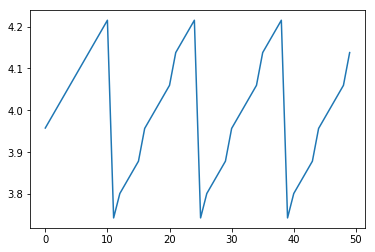

In [7]:
X = [[-2, -1],
     [-1, 3],
     [2.5, -1.5],
     [4, 2]]
Y = [-1, 1, 1, -1]
alpha, losses = train_ksvm(X, Y, 50, 0.001, [0.1, 0.0, -0.1, 0.0], k1)
pl.plot(losses)
print(alpha)
for x in X:
    print(predict_ksvm(alpha, X, k2, x))

### (b) (0.5)
**Does the learned model predict well the training samples? Why? Explain**

*** No, because the kernel represents a lineal relation ***

-----------
Now we will train the model using the kernel `k2`

[ 0.008    0.256    0.22675 -0.257  ]
-19.1118125
36.82599999999999
13.2821875
-95.873


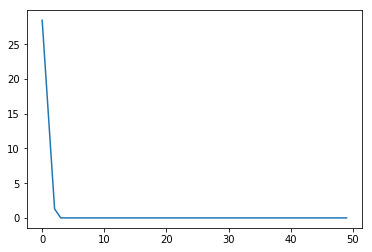

In [8]:
alpha, losses = train_ksvm(X, Y, 50, 0.001, [0.1, 0.0, -0.1, 0.0], k2)
pl.plot(losses)
print(alpha)
for x in X:
    print(predict_ksvm(alpha, X, k2, x))

### (c) (0.5)
**What does happen now? Are the results different from the previous experiment? Explain.**

It predict well the training samples, because it uses a polinomial kernel.

## 4. (1.0)
Implement a regularized version of the model that penalizes the square of the norm of $w$:
$$E(w, x, y) = \max(0, 1 - y f_w(x)) + C||w||^2$$
where $C$ is a parameter.

In [9]:
def rloss_ksvm(alpha, X, kernel, x, y, C):
    result = 0
    # put your code here
    reg = C * np.dot(np.transpose(alpha), alpha) * kernel(np.transpose(X), X)
    print("reg shape {}".format(reg.shape))
    result = loss_ksvm(alpha, X, kernel, x, y) + reg
    return result

def rde_dalpha(alpha, X, kernel, x, y, C):
    delta = np.zeros(len(alpha))
    # put your code here
    for i in range(len(X)):
        delta[i] = -y * kernel(X[i], x) + 2*C * np.sum(alpha) * kernel(X[i], x)
    return delta

def rtrain_ksvm(X, Y, epochs, eta, C, alpha_ini, kernel):
    losses = []
    alpha = alpha_ini
    for i in range(epochs):
        ## Your code here
        for i, x in enumerate(X):
            y = Y[i]
            alpha = alpha - eta*rde_dalpha(alpha, X, kernel, x, y, C)
        ##
        losses.append(evaluate_ksvm(alpha, X, kernel, X, Y))
    return alpha, losses

Evaluate your model with different values of C and showing the loss vs epochs curves.

**Note:** This question does not have validation code. It will not get partial credit.

[ -5.4375   7.4      2.7    -22.45  ]
-1997.3249999999973
790.5499999999996
-960.7093749999982
-10101.487499999987
[ -3.68928688  15.03741898   6.6610055  -18.61589963]
-1599.0709132541954
1891.7807981642188
-71.9727897237317
-7946.802851081411
[ -2.45875576  20.52095226   5.60150806 -24.52341716]
-2039.9025719571532
2463.9787587432165
-340.5755378983481
-10470.801097777523
[  1.03623887  19.13938931   1.07723979 -22.27722581]
-1760.4179425264826
2154.1517065738794
-633.027052634684
-9499.123382636159
[  4.00667025  10.6467497   -2.73651275 -12.79808012]
-909.5075653580221
1074.5595341547244
-657.7227248966608
-5398.729110912946


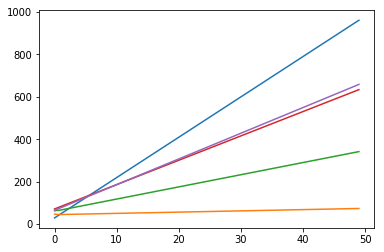

In [10]:
C=0.5
for C in range(5):
    alpha, losses = rtrain_ksvm(X, Y, 50, 0.001, C, [0.1, 0.0, -0.1, 0.0], k2)
    pl.plot(losses, label=C)
    print(alpha)
    for x in X:
        print(predict_ksvm(alpha, X, k2, x))